In [2]:
import wandb
import matplotlib.pyplot as plt

In [14]:
from plots import compare_runs_by_category, plot_training_curves, fetch_multiple_runs


✓ Fetched data for run: best_gine5_seed=0 (wetgcuj4)
✓ Fetched data for run: baseline (4paozhos)
✓ Fetched data for run: gine5_seed=0 (67kzs4j1)


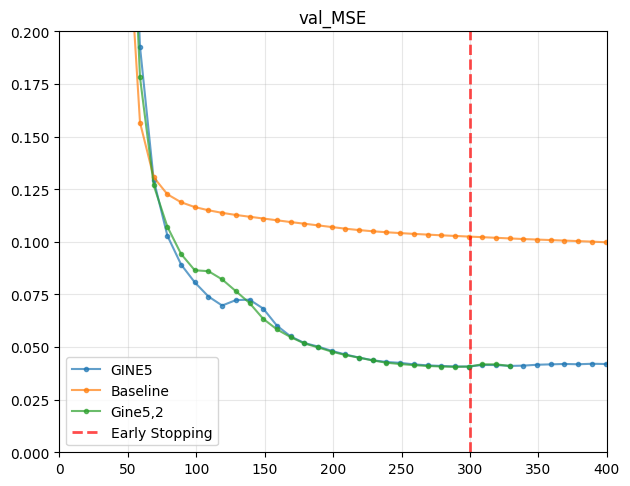

✓ Fetched data for run: best_gine5_seed=0 (wetgcuj4)
✓ Fetched data for run: baseline (4paozhos)
✓ Fetched data for run: gine5_seed=0 (67kzs4j1)


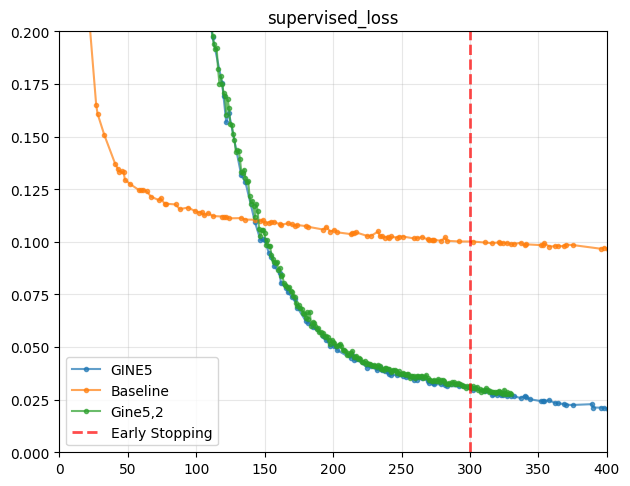

✓ Fetched data for run: best_gine5_seed=0 (wetgcuj4)
✓ Fetched data for run: baseline (4paozhos)
✓ Fetched data for run: gine5_seed=0 (67kzs4j1)


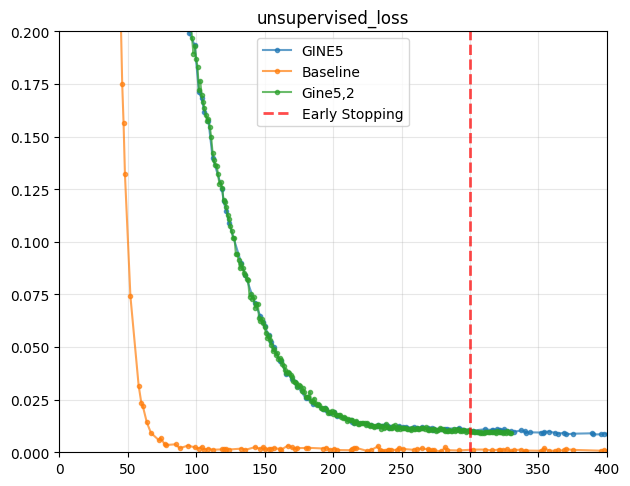

In [65]:
entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE', 'supervised_loss', 'unsupervised_loss']
runs_ids = ['wetgcuj4', '4paozhos','67kzs4j1']
labels = ['GINE5', 'Baseline', 'Gine5,2']

for metric in metrics:
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)


    for run_id, data in runs_data.items():
        history = data["history"]

        label = labels[runs_ids.index(run_id)] if labels else run_id

        # Plot the metric
        if metric in history.columns and "_step" in history.columns:
            # Filter out NaN values
            valid_data = history[[metric, "_step"]].dropna()
            plt.plot(valid_data["_step"], valid_data[metric], label=label, marker='o', markersize=3, alpha=0.7)
        else:
            print(f"Warning: {metric} not found in run {run_id}")

    plt.axvline(x=300, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Early Stopping')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0,0.2)
    plt.xlim(0,400)
    plt.tight_layout()
    plt.title(metric)
    plt.show()

    